<a href="https://colab.research.google.com/github/matin/garth/blob/main/colabs/stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Garmin stress statistics

## Setup

Start by installing and importing `garth`

In [1]:
%pip install garth >& /dev/null

In [2]:
import garth

Define Garth access token location to save and resume sessions

In [3]:
GARTH_HOME = 'drive/MyDrive/garth'

Mount Drive for saving and resuming sessions

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Resume session or login, and make sure to save the garth session for next time

In [5]:
from garth.exc import GarthException
from getpass import getpass
from requests import HTTPError

try:
    garth.resume(GARTH_HOME)
    garth.client.username
except (GarthException, HTTPError, FileNotFoundError):
    email = input("Email: ")
    password = getpass("Password: ")
    garth.client.login(email, password)

garth.save(GARTH_HOME)

## Weekly stress

Get the most recent week

In [6]:
garth.WeeklyStress.list()

[WeeklyStress(calendar_date=datetime.date(2023, 7, 29), value=28)]

Get the last two years

In [7]:
weekly_stress = garth.WeeklyStress.list(period=104)

Use pandas and matplotlib to graph

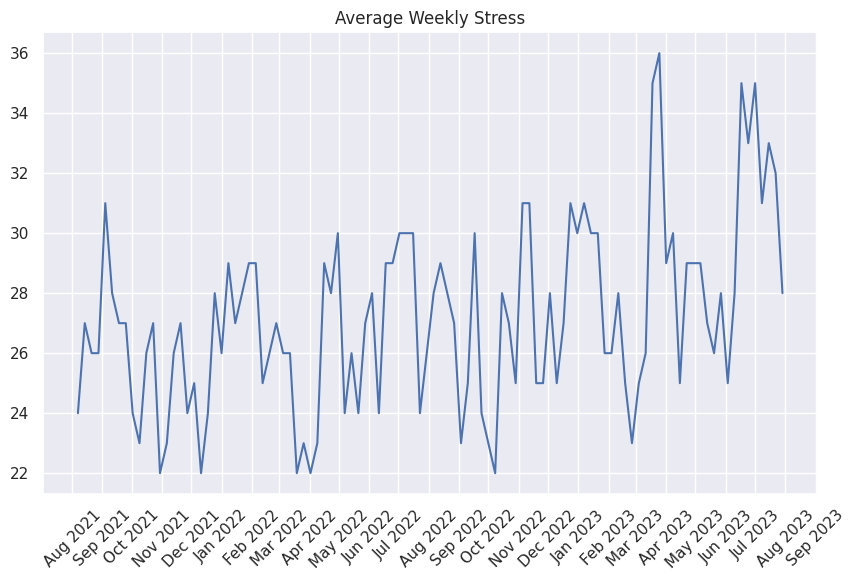

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import pyplot as plt

df = pd.DataFrame(weekly_stress).sort_values('calendar_date')

sns.set_theme()

plt.figure(figsize=(10, 6))

sns.lineplot(x=df['calendar_date'], y=df['value'])

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Average Weekly Stress')

plt.show()

## Daily stress

Retrieve daily averages by week. This takes a while to run.

---



Get yesterday's stress levels

In [9]:
from datetime import date, timedelta

garth.DailyStress.list(date.today() - timedelta(days=1))

[DailyStress(calendar_date=datetime.date(2023, 8, 3), overall_stress_level=37, rest_stress_duration=11040, low_stress_duration=23160, medium_stress_duration=6120, high_stress_duration=2280)]

Get up to the last three years

In [10]:
daily_stress = garth.DailyStress.list(period=365 * 3)

Daily stats are going to have a *lot* of noise, so let's also graph the smoothed 28-day rolling average

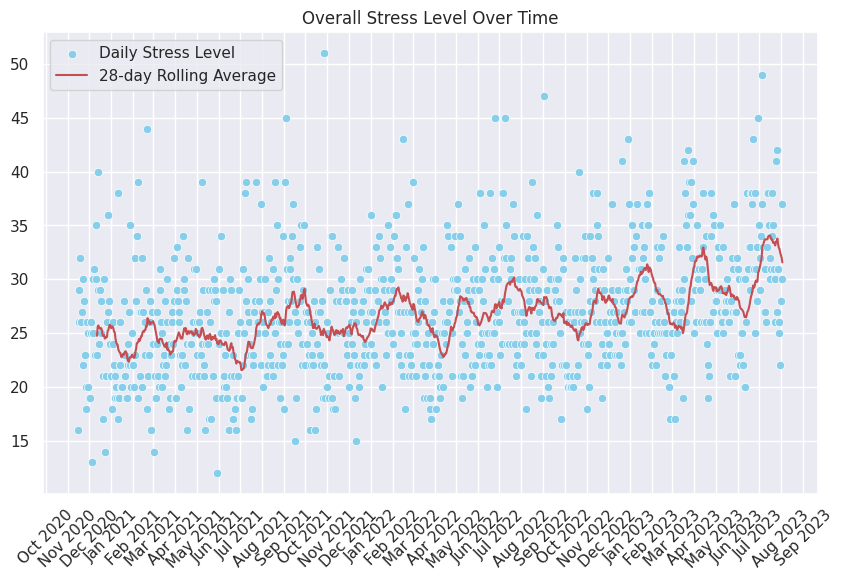

In [11]:
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import pyplot as plt

sns.set_theme()

df = pd.DataFrame(daily_stress)
df.set_index('calendar_date', inplace=True)

df['rolling_avg'] = df['overall_stress_level'].rolling(window=28).mean()

plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=df.index,
    y=df['overall_stress_level'],
    color='skyblue',
    label='Daily Stress Level'
)

sns.lineplot(
    x=df.index,
    y=df['rolling_avg'],
    color='r',
    label='28-day Rolling Average'
)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)

# Set labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Overall Stress Level Over Time')
plt.legend()

# Show the plot
plt.show()